In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load the data from csv file to Pandas DataFrame, i already have train & test data..
train= pd.read_csv('titanic.csv')
test= pd.read_csv('train_test.csv')   # Just for seprate predictions.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# number of rows and Columns
train.shape

(891, 12)

In [6]:
# number of rows and Columns
test.shape

(418, 11)

In [7]:
# getting some informations about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check the number of missing values in train dataset..
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# check the number of missing values in test dataset..
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling the Missing values:

In [10]:
# drop the "Cabin" column from the dataframe, cozz there is to many missing values in this col..
train.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)

In [11]:
# 2 missing values in EMbarked col: so we fill them with mode of Embarked and that is 'S'..
train['Embarked'].fillna('S',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14408\668116672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [12]:
# 1 missing values in Frare col: so we fill them with mean of Fare col..
test['Fare'].fillna(test['Fare'].mean( ),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14408\4030118622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean( ),inplace=True)


In [13]:
# we use randint function in this function we add lower rang and upper range and total missing values value that going to be genrated..
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [14]:
# we use randint function in this function we add lower rang and upper range and total missing values value that going to be genrated..
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [15]:
# Here we replace missing values with the values that we genrated in train_age using randint function...
train['Age'][train['Age'].isnull()] = train_age

C:\Users\dell\AppData\Local\Temp\ipykernel_14408\2765044823.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] = train_age
C:\Users\dell\AppData\Local\Temp\ipykernel_14408\2765044823.py:2: SettingWithCopy

In [16]:
# Here we replace missing values with the values that we genrated in test_age using randint function
test['Age'][test['Age'].isnull()] = test_age

C:\Users\dell\AppData\Local\Temp\ipykernel_14408\2078913401.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()] = test_age
C:\Users\dell\AppData\Local\Temp\ipykernel_14408\2078913401.py:2: SettingWithCopyWar

In [17]:
# Now check again missing values in the datasets:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Now check again missing values in the datasets:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA:

In [19]:
# getting some statistical measures about the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.455859,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.517424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# getting some statistical measures about the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.455859,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.517424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# finding the number of people survived and not survived
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

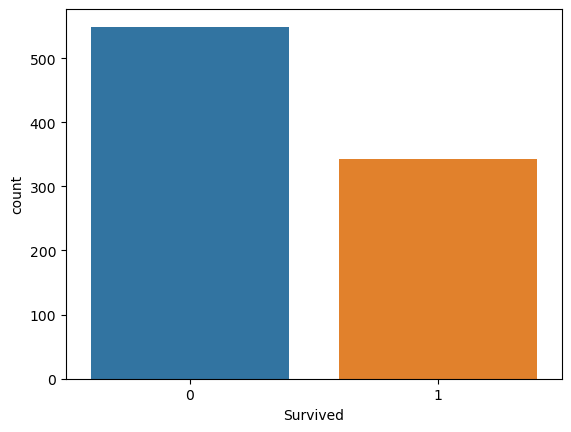

In [22]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=train)


In [23]:
# finding the number of mean of survived people in every class:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

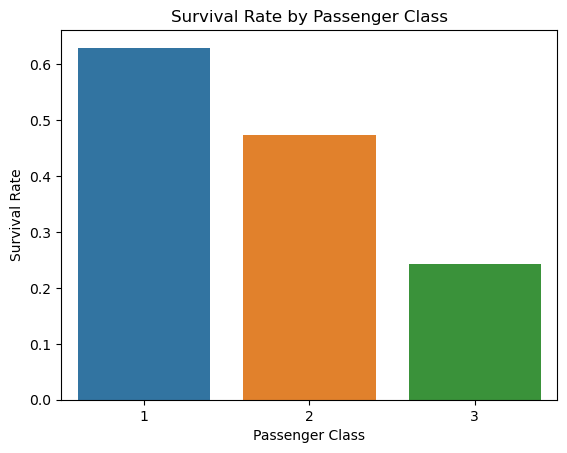

In [24]:
pclass_survival = train.groupby(['Pclass'])['Survived'].mean()

# Plotting the survival rate for each Pclass
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)

# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [25]:
# Checking the count of Sex col:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

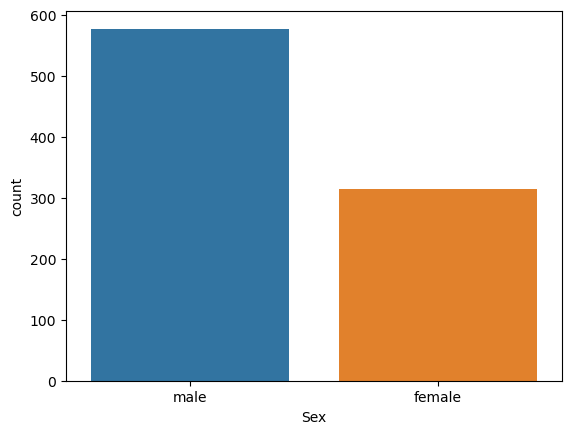

In [26]:
# # making a count plot for "Sex" column
sns.countplot(x='Sex', data=train)


In [27]:
# Calculate the mean survival rate for each gender
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

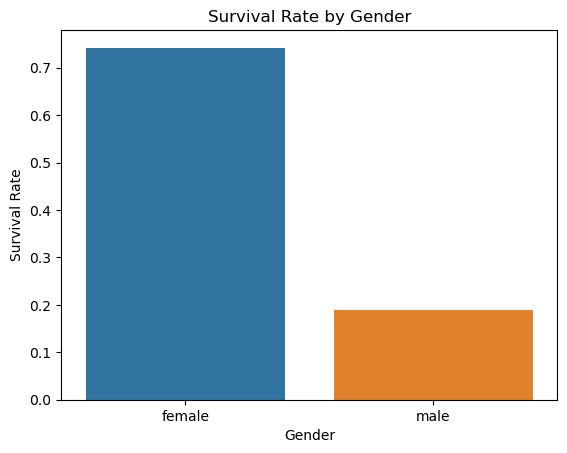

In [28]:
# Calculate the mean survival rate for each gender
gender_survival = train.groupby(['Sex'])['Survived'].mean()

# Plotting the survival rate for each gender
sns.barplot(x=gender_survival.index, y=gender_survival.values)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

In [29]:
# Calculate the mean survival rate for each embarkation point
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

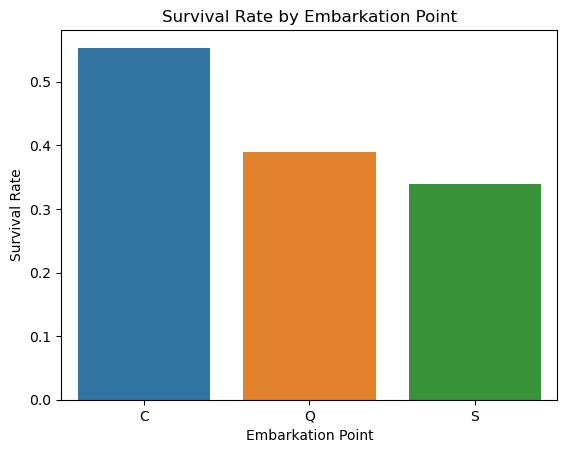

In [30]:
# Calculate the mean survival rate for each embarkation point
embarked_survival = train.groupby(['Embarked'])['Survived'].mean()

# Plotting the survival rate for each embarkation point
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)

# Adding labels and title
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Point')
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


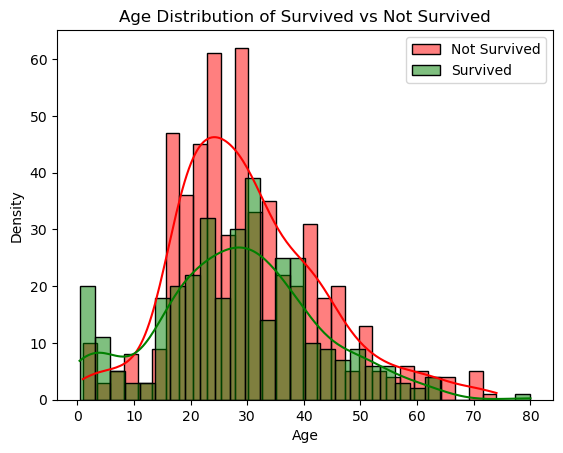

In [31]:
sns.histplot(train['Age'][train['Survived'] == 0], kde=True, color='red', label='Not Survived', bins=30)

# Plotting the distribution of Age for passengers who survived
sns.histplot(train['Age'][train['Survived'] == 1], kde=True, color='green', label='Survived', bins=30)

# Adding a legend
plt.legend()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Survived vs Not Survived')

# Show the plot
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


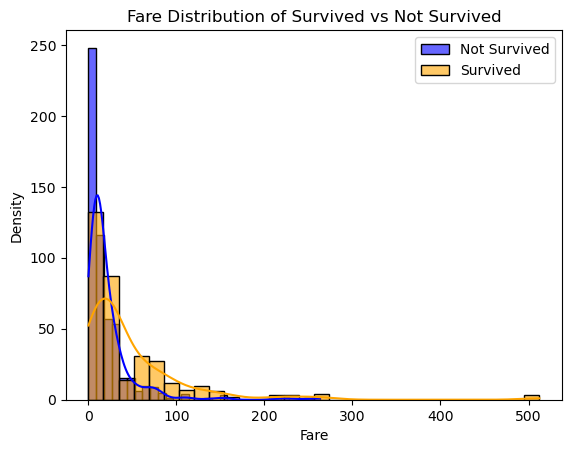

In [32]:
# Plotting the distribution of Fare for passengers who did not survive
sns.histplot(train['Fare'][train['Survived'] == 0], kde=True, color='blue', label='Not Survived', bins=30, alpha=0.6)

# Plotting the distribution of Fare for passengers who survived
sns.histplot(train['Fare'][train['Survived'] == 1], kde=True, color='orange', label='Survived', bins=30, alpha=0.6)

# Adding a legend
plt.legend()

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution of Survived vs Not Survived')


# Show the plot
plt.show()

## Feature Engineering:

In [33]:
# we don't need ticket col so we drop this col:
train.drop(columns='Ticket',inplace=True)

In [34]:
# we don't need ticket col so we drop this col:
test.drop(columns='Ticket',inplace=True)

In [35]:
# now we make new col 'family' by combine these  'SibSp' & 'Parch' cols in train: 
train['family'] = train['SibSp'] + train['Parch'] + 1  # add one cozz we also want to add the person who buy a ticket..

In [36]:
# now we make new col 'family' by combine these  'SibSp' & 'Parch' cols in train:
test['family'] = test['SibSp'] + test['Parch'] + 1   # add one cozz we also want to add the person who buy a ticket..

In [37]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

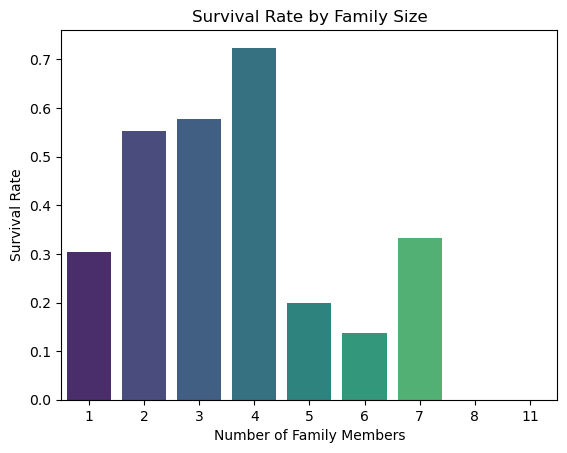

In [38]:
# Calculate the mean survival rate for each family size
family_survival = train.groupby(['family'])['Survived'].mean()

# Plotting the survival rate for each family size
sns.barplot(x=family_survival.index, y=family_survival.values, palette="viridis")

# Adding labels and title
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')

# Show the plot
plt.show()

In [39]:
# Here we make a func for family sizes...
def cal(number):
    if number ==1:
        return 'Alon'
    elif number >1 and number<=5:
        return 'Medium'
    else:
        return 'Large'
    

In [40]:
# now we apply the 'cal' func on train data, and make a new col 'family_size'.
train['family_size'] = train['family'].apply(cal)

In [41]:
# now we apply the 'cal' func on train data, and make a new col 'family_size'.
test['family_size'] = test['family'].apply(cal)

In [42]:
# Now drop the these col from train data, cozz we made 'familt_size' cols that tell details about family..
train.drop(columns=['SibSp','Parch','family'],inplace=True)

In [43]:
# Now drop the these col from test data, cozz we made 'familt_size' cols that tell details about family..
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [44]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [45]:
PassengerId = test['PassengerId'].values  # save the 'PassengerId' col of test data, cozz we need this for prediction..

In [46]:
# now drop 'Name' & 'PassengerId' cols , cozz we don't need them for predictions
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

## Label Encoding:

In [47]:
# Now we encode categorical data into numerical cols in train data for ML Algorithm...
train= pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True).astype('int')

In [48]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Survived            891 non-null    int32
 1   Age                 891 non-null    int32
 2   Fare                891 non-null    int32
 3   Pclass_2            891 non-null    int32
 4   Pclass_3            891 non-null    int32
 5   Sex_male            891 non-null    int32
 6   Embarked_Q          891 non-null    int32
 7   Embarked_S          891 non-null    int32
 8   family_size_Large   891 non-null    int32
 9   family_size_Medium  891 non-null    int32
dtypes: int32(10)
memory usage: 34.9 KB


In [49]:
# Now we encode categorical data into numerical cols in test data for ML Algorithm...
test= pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True).astype('int')

## train_test_split:

In [50]:
X = train.drop(columns='Survived')  #input cols

In [51]:
y= train['Survived']  # output col

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## DecisionTreeClassifier:

In [53]:
#  we use DecisionTreeClassifier to make model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [54]:
# training the model with training data
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
# accuracy on training data
y_pred = classifier.predict(X_test)

In [56]:
print(y_pred)

[0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7486033519553073

In [58]:
# lets use one more algorithm and check which one give better accuracy on this data:

## Logistic Regression:

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
# training the model with training data
model.fit(X_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
# Predicions...
y_predict = model.predict(X_test)

In [62]:
print(y_predict)

[0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1
 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0]


In [63]:
# accuracy on training data...
accuracy_score(y_predict,y_test)

0.7653631284916201

## RandomForestClassifier:

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  


In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [66]:
# accuracy on training data
y_prediction = rf.predict(X_test)

In [67]:
print(y_prediction)

[1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0]


In [68]:
accuracy_score(y_prediction,y_test)

0.7653631284916201

In [69]:
# As we can see logistic regression has the best accuracy score so we gonna use LR model

#### Now we check accuracy on test dataset:

In [70]:
xf= test.iloc[:,:].values

In [71]:
# both algo have same accuracy so we use DecisionTreeClassifier...
y_final = rf.predict(xf)  

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
print(y_final)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [73]:
y_final.shape

(418,)

In [74]:
final = pd.DataFrame() # make a new dataframe for survival prediction file...

In [75]:
# here we make a dataframe and add 'PassengerId' col and also add predictions that our algo preidct...
final['PassengerId'] = PassengerId
final['Survived'] = y_final

In [76]:
final.to_csv('Submission.csv',index=False)  # Here is the file of predictions of test dataset....

## Exporting the model:

In [77]:
import pickle

In [78]:

# Save the trained model to a file named 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
